In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

In [2]:
print(np.finfo(np.float128))

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
smallest_normal = 3.3621031431120935063e-4932   smallest_subnormal = 4e-4951
---------------------------------------------------------------



In [3]:
a = 0
b = 0.25*np.pi
f = lambda x: np.sin(x)

In [4]:
I = -np.cos(b) + np.cos(a)
I

0.2928932188134524

In [5]:
n = 8
Roots1, Weights1 = np.polynomial.legendre.leggauss(n)

In [6]:
t1 = 0.5*( (b-a)*Roots1 + a + b )
Integral1 = 0.5*(b-a)*np.sum(Weights1*f(t1))
Integral1

0.2928932188134524

In [8]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

In [9]:
def GetLegendre(n,x,y):
  y = (x**2 - 1)**n
  poly = sym.diff(y,x,n)/(2**n*np.math.factorial(n))

  return poly

In [10]:
Legendre = []
DLegendre = []

for i in range(n+1):
  Poly = GetLegendre(i,x,y)
  Legendre.append(Poly)
  DLegendre.append( sym.diff(Poly,x,1) )

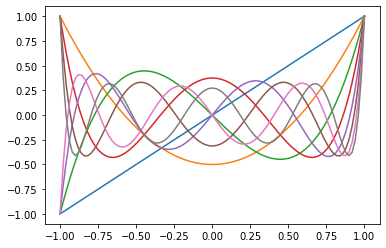

In [12]:
_x = np.linspace(-1,1,100)

for i, p in enumerate(Legendre):
  if i != 0:
    pn = sym.lambdify([x],p,'numpy')
    plt.plot(_x,pn(_x))

In [16]:
def GetAllRoots(n,xn,Legendre,DLegendre):

  poly = sym.lambdify([x],Legendre[n],'numpy')
  Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
  Roots = GetRoots(poly,Dpoly,xn)

  return Roots

In [17]:
#scan
xn = np.linspace(-1,1,100)
Roots = GetAllRoots(n,xn,Legendre,DLegendre)

In [20]:
#el metodo mas eficiente es el de la derecha
for i in range(len(Roots)):
  print(Roots[i],Roots1[i])

-0.96028985649754 -0.9602898564975362
-0.79666647741363 -0.7966664774136267
-0.52553240991633 -0.525532409916329
-0.18343464249565 -0.18343464249564978
0.18343464249565 0.18343464249564978
0.52553240991633 0.525532409916329
0.79666647741363 0.7966664774136267
0.96028985649754 0.9602898564975362


In [13]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [14]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [15]:
integrate.quad(f,a,b)

(0.2928932188134524, 3.2517679528326894e-15)

In [21]:
def GetWeights(Roots,DLegendre):

  Dpoly = sym.lambdify([x],DLegendre[n],'numpy')
  Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)

  return Weights
  

In [22]:
Weights = GetWeights(Roots,DLegendre)

In [23]:
#el metodo mas eficiente es el de la derecha
for i in range(len(Roots)):
  print(Weights[i],Weights1[i])

0.10122853629036697 0.10122853629037669
0.22238103445337154 0.22238103445337434
0.31370664587788705 0.31370664587788705
0.362683783378362 0.36268378337836177
0.362683783378362 0.36268378337836177
0.31370664587788705 0.31370664587788705
0.22238103445337154 0.22238103445337434
0.10122853629036697 0.10122853629037669
